# Proyek Analisis Data: Nama dataset
- Kelompok :
- Anggota : </br>
10110001 - Asep Suherlan</br>
10110002 - Budi Suaep

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan dalam jumlah penyewa sepeda antara musim panas, musim gugur, musim dingin, dan musim semi? 
- Bagaimana cuaca mempengaruhi jumlah penyewa sepeda ?
- Apakah ada perbedaan  dalam pola penyewaan antara hari kerja dan akhir pekan ?
- jam berapakah banyaknya penyewa ?
- apakah tiap tahun mengalami kenaikan jumlah penyewa ?
- apakah tiap bulan mengalami kenaikan jumlah penyewa ?

## Menyaipkan semua library yang dibuthkan

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Data Wrangling

### Gathering Data

In [476]:
dataBike = pd.read_csv('./data/Bike-sharing-dataset/day.csv')
dataBikeHour = pd.read_csv('./data/Bike-sharing-dataset/hour.csv')


### Assessing Data

#### data 5 teratas

In [477]:
display(dataBike.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### info data

In [478]:
display(dataBikeHour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [479]:
display(dataBike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

In [480]:
display(dataBikeHour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

#### statistik deskriktif dalam numerik

In [481]:
display(dataBike.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [482]:
display(dataBikeHour.describe())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### data null

In [483]:
print(dataBike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [484]:
print(dataBikeHour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### data duplicate

In [485]:
print('Data Duplicate : ',dataBike.duplicated().sum())

Data Duplicate :  0


In [486]:
print('Data Duplicate : ',dataBikeHour.duplicated().sum())

Data Duplicate :  0


### Cleaning Data

### karena tidak ada yang kosong dan tidak ada yang duplicate jadi tidak perlu di cleaning data lagi

## Exploratory Data Analysis (EDA)

### Explore ...

#### menambahkan kolom baru

In [488]:
dataBike['dteday'] = pd.to_datetime(dataBike['dteday']) # mengubah dteday menjadi datetime
dataBike['bulan'] = dataBike['dteday'].dt.to_period('M') # menambahkan kolom bulan
dataBike['Hari'] = dataBike['dteday'].dt.day_name() # menambah kolom hari dengan nama harinya
dataBike['Tipe Hari'] = dataBike['Hari'].apply(lambda x : 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday') # menambah kolom tipe hari weekday / weekend
dataBikeHour['jam'] = dataBikeHour['hr'].apply(lambda x : f"{x:02d}:00") # menambah kolom jam 
dataBike['tahun']= dataBike['dteday'].dt.year # menambah kolom tahun
dataBike['musim'] = dataBike['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

#### mengelompokan bulan dan jumlahnya penyewa (musim)

In [489]:
dataPerbulanMusim = dataBike.groupby(['bulan', 'musim'])['cnt'].sum()
dataPerbulanMusim = dataPerbulanMusim.ffill()

#### mengelompokan bulan dan jumlahnya penyewa (Cuaca)

In [490]:
dataPerbulanCuaca = dataBike.groupby(['bulan', 'weathersit'])['cnt'].sum()
dataPerbulanCuaca = dataPerbulanCuaca.ffill()

#### mengelompokan tahun dan jumlahnya penyewa

In [491]:
dataPertahun = dataBike.groupby('tahun')['cnt'].sum()

#### mengelompokan jam dan jumlahnya penyewa

In [492]:
dataHour = dataBikeHour.groupby('jam')['cnt'].sum()

#### mengelompokan musim dan jumlahnya penyewa
- melakukan sort dari terkecil ke terbanyak

In [493]:
dataMusim = dataBike.groupby('musim')['cnt'].sum().sort_values()

#### mengambil data cuaca permusim

In [494]:
dataMusimSemi = dataBike[dataBike['musim'] == 'Musim Semi']
jumlahCuacaMusimSemi = dataMusimSemi.groupby('weathersit')['cnt'].sum()



dataMusimDingin = dataBike[dataBike['musim'] == 'Musim Dingin']
jumlahCuacaMusimDingin = dataMusimDingin.groupby('weathersit')['cnt'].sum()

dataMusimPanas = dataBike[dataBike['musim'] == 'Musim Panas']
jumlahCuacaMusimPanas = dataMusimPanas.groupby('weathersit')['cnt'].sum()

dataMusimGugur = dataBike[dataBike['musim'] == 'Musim Gugur']
jumlahCuacaMusimGugur = dataMusimGugur.groupby('weathersit')['cnt'].sum()

for i in range(1,5):
    if i not in jumlahCuacaMusimSemi.index:
        jumlahCuacaMusimSemi[i] = 0
    if i not in jumlahCuacaMusimDingin.index:
        jumlahCuacaMusimDingin[i] = 0
    if i not in jumlahCuacaMusimPanas.index:
        jumlahCuacaMusimPanas[i] = 0
    if i not in jumlahCuacaMusimGugur.index:
        jumlahCuacaMusimGugur[i] = 0

#### mengelompokan hari dan jumlahnya penyewa

In [495]:
dataPerHari = dataBike.groupby('Hari')['cnt'].sum()

#### mengelompokan tipe hari (weekday / weekend) dan jumlahnya penyewa

In [496]:
dataTipeHari = dataBike.groupby('Tipe Hari')['cnt'].sum()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Apakah terdapat perbedaan dalam jumlah penyewa sepeda antara musim panas, musim gugur, musim dingin, dan musim semi? 

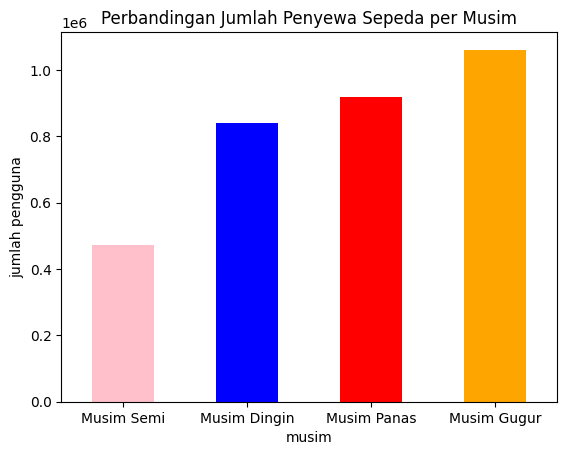

In [497]:
dataMusim.plot(kind='bar',color=['pink', 'blue', 'red', 'orange'] )
plt.title('Perbandingan Jumlah Penyewa Sepeda per Musim')
plt.xlabel('musim')
plt.ylabel('jumlah pengguna')
plt.xticks(rotation= 0)
plt.show()

### Pertanyaan 2 : Bagaimana cuaca mempengaruhi jumlah penyewa sepeda ?

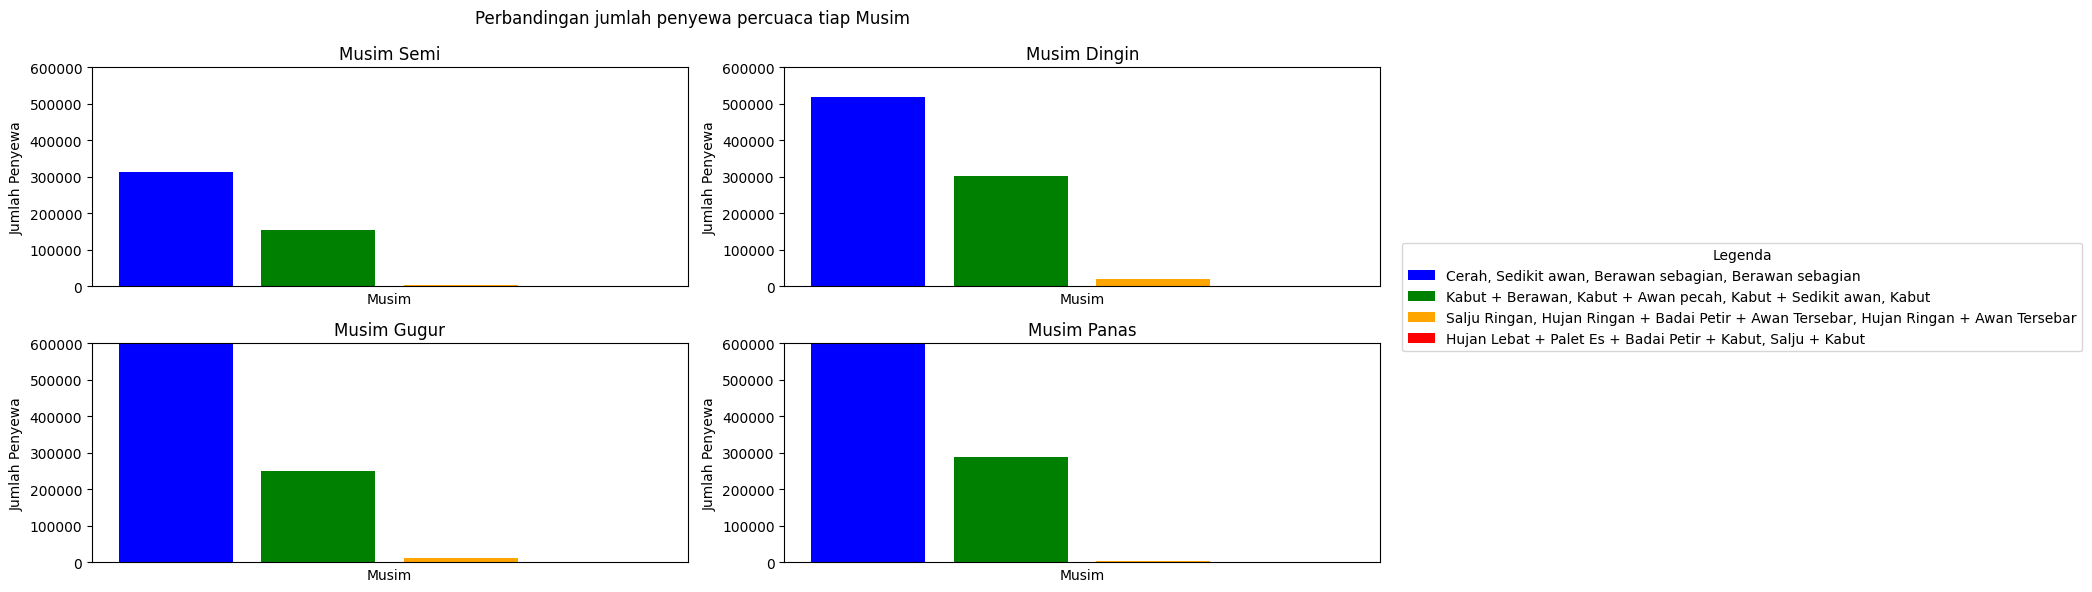

In [498]:
labelCuaca = jumlahCuacaMusimSemi.index.map({1: 'Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian', 2: 'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut', 3: 'Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar', 4: 'Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut'}).tolist()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
fig.suptitle('Perbandingan jumlah penyewa percuaca tiap Musim ')

axes[0 , 0].bar(jumlahCuacaMusimSemi.index.astype(str), jumlahCuacaMusimSemi, color=['blue', 'green', 'orange', 'red'] ,label=labelCuaca)
axes[0 , 0].set_title('Musim Semi')
axes[0 , 0].set_xlabel('Musim')
axes[0 , 0].set_ylabel('Jumlah Penyewa')
axes[0 , 0].set_ylim([0, 600000])  
axes[0 , 0].set_xticks([])

axes[0, 1].bar(jumlahCuacaMusimDingin.index.astype(str), jumlahCuacaMusimDingin, color=['blue', 'green', 'orange', 'red'])
axes[0, 1].set_title('Musim Dingin')
axes[0, 1].set_xlabel('Musim')
axes[0, 1].set_ylabel('Jumlah Penyewa')
axes[0, 1].set_ylim([0, 600000])
axes[0, 1].set_xticks([])

axes[1, 0].bar(jumlahCuacaMusimGugur.index.astype(str), jumlahCuacaMusimGugur, color=['blue', 'green', 'orange', 'red'])
axes[1, 0].set_title('Musim Gugur')
axes[1, 0].set_xlabel('Musim')
axes[1, 0].set_ylabel('Jumlah Penyewa')
axes[1, 0].set_ylim([0, 600000]) 
axes[1, 0].set_xticks([])

axes[1, 1].bar(jumlahCuacaMusimPanas.index.astype(str), jumlahCuacaMusimPanas, color=['blue', 'green', 'orange', 'red'])
axes[1, 1].set_title('Musim Panas')
axes[1, 1].set_xlabel('Musim')
axes[1, 1].set_ylabel('Jumlah Penyewa')
axes[1, 1].set_ylim([0, 600000])
axes[1, 1].set_xticks([])

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legenda')
plt.subplots_adjust(right=0.85)
plt.tight_layout()
plt.show()


### Pertanyaan 3 : Apakah ada perbedaan  dalam pola penyewaan antara hari kerja dan akhir pekan ?

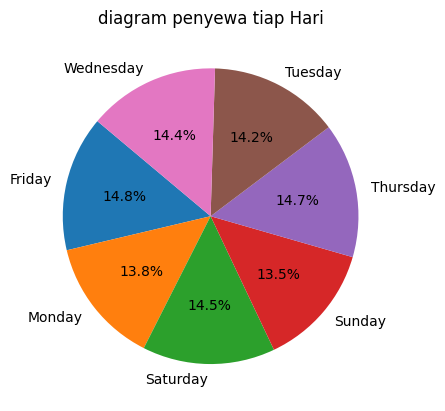

In [499]:
plt.pie(dataPerHari, labels=dataPerHari.index ,   autopct='%1.1f%%', startangle=140)
plt.title("diagram penyewa tiap Hari")
plt.show()

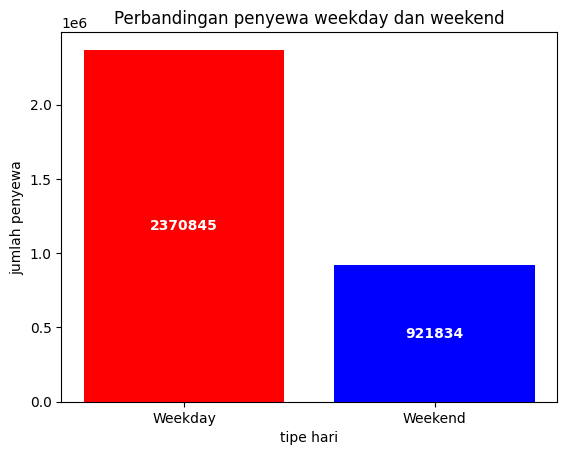

In [500]:
plt.bar(dataTipeHari.index, dataTipeHari, color=['red','blue'])
plt.title('Perbandingan penyewa weekday dan weekend')
plt.xlabel('tipe hari')
plt.ylabel('jumlah penyewa')

for i , value in enumerate(dataTipeHari):
    plt.text(i,value/2, str(value), ha='center',va='center', color="white", fontweight='bold')

plt.show()

### Pertanyaan 4 : jam berapakah banyaknya penyewa ?

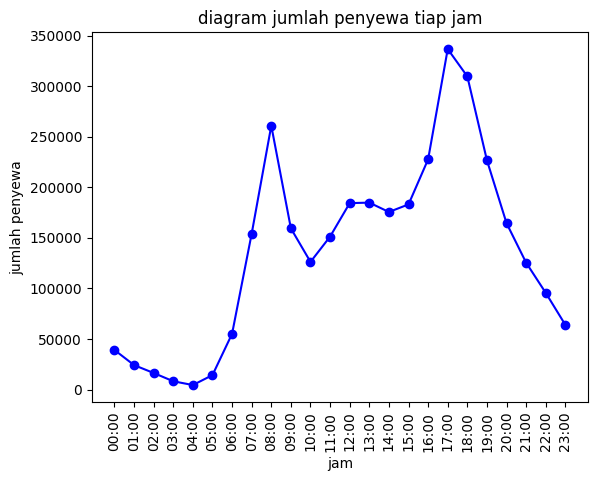

In [501]:
plt.plot(dataHour.index, dataHour , marker='o', linestyle='-', color='blue')
plt.xticks(rotation=90)
plt.title('diagram jumlah penyewa tiap jam')
plt.xlabel('jam')
plt.ylabel('jumlah penyewa')
plt.show()

### Pertanyaan 5 : apakah tiap tahun mengalami kenaikan jumlah penyewa ?

dari 2011 ke 2012 mengalami kenaikan sebesar 64%


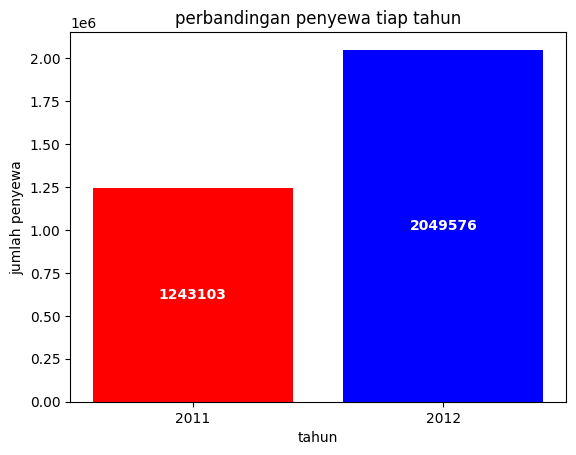

In [502]:
plt.bar(dataPertahun.index.astype(str), dataPertahun, color=['red','blue'])
plt.title('perbandingan penyewa tiap tahun')
plt.xlabel('tahun')
plt.ylabel('jumlah penyewa')

for i , value in enumerate(dataPertahun):
    plt.text(i,value/2, str(value), ha='center',va='center', color="white", fontweight='bold')

print(f'dari 2011 ke 2012 mengalami kenaikan sebesar {int(((dataPertahun[2012]- dataPertahun[2011])/dataPertahun[2011])*100)}%')
plt.show()

### Pertanyaan 6 : apakah tiap bulan mengalami kenaikan jumlah penyewa ?

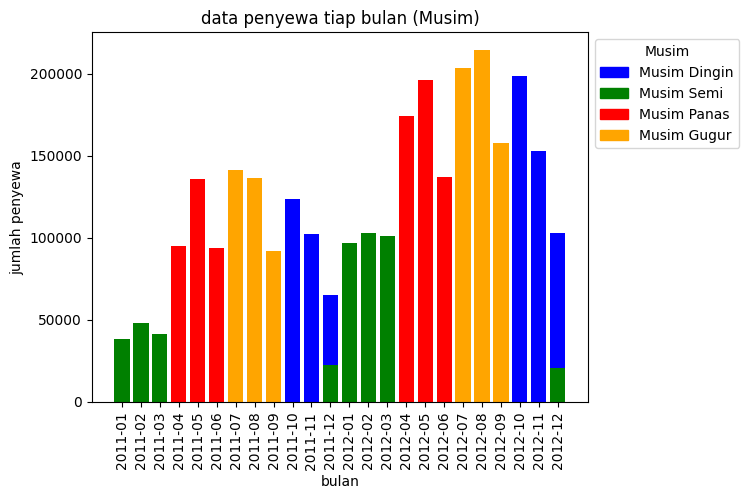

In [503]:
colors = {'Musim Dingin': 'blue', 'Musim Semi': 'green', 'Musim Panas': 'red', 'Musim Gugur': 'orange'}

bulan = [i[0] for i in dataPerbulanMusim.index]

pengguna = [i for i in dataPerbulanMusim]


plt.bar([str(i[0]) for i in dataPerbulanMusim.index], [i for i in dataPerbulanMusim], color=[colors[i[1]] for i in dataPerbulanMusim.index],  label=[i[1] for i in dataPerbulanMusim.index] )
plt.title('data penyewa tiap bulan (Musim)')
plt.xticks(rotation = 90)
plt.xlabel('bulan')
plt.ylabel('jumlah penyewa')

legend_labels = ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur']
legend_colors = ['blue', 'green', 'red', 'orange']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches,  title='Musim', bbox_to_anchor=(1, 1))

plt.show()


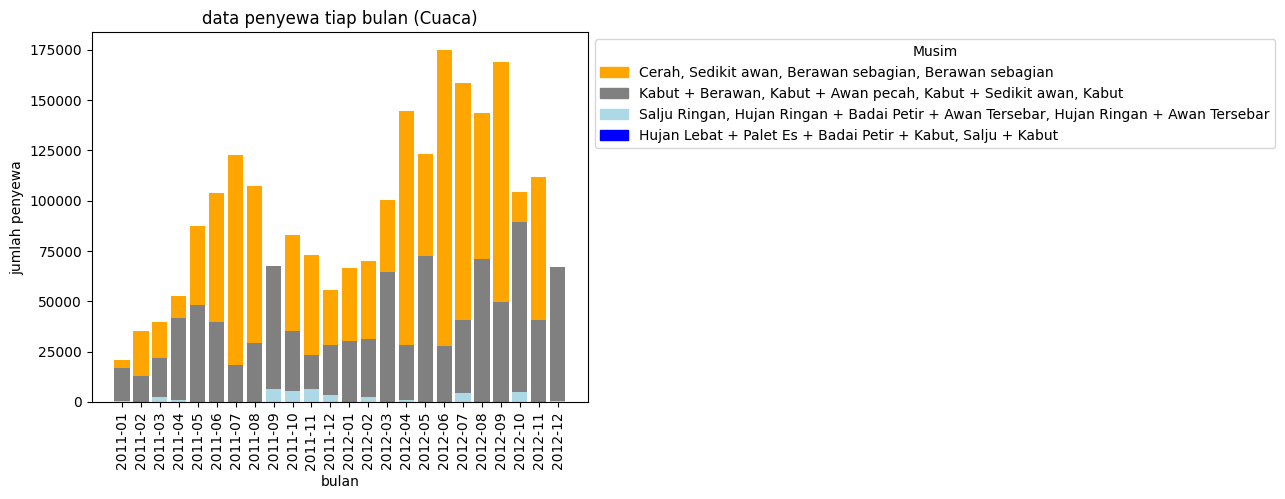

In [504]:
colors = {1: 'orange', 2: 'gray', 3: 'lightblue', 4: 'blue'}

bulan = [i[0] for i in dataPerbulanCuaca.index]

pengguna = [i for i in dataPerbulanCuaca]


plt.bar([str(i[0]) for i in dataPerbulanCuaca.index], [i for i in dataPerbulanCuaca], color=[colors[i[1]] for i in dataPerbulanCuaca.index],  label=[i[1] for i in dataPerbulanCuaca.index] )
plt.title('data penyewa tiap bulan (Cuaca)')
plt.xticks(rotation = 90)
plt.xlabel('bulan')
plt.ylabel('jumlah penyewa')

legend_labels = ['Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian',  'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut', 'Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar', 'Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut']
legend_colors = ['orange', 'gray', 'lightblue', 'blue']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches,  title='Musim', bbox_to_anchor=(1, 1))

plt.show()


## Conclusion

- Conclution pertanyaan 1 : Apakah terdapat perbedaan dalam jumlah penyewa sepeda antara musim panas, musim gugur, musim dingin, dan musim semi? 
    dilihat dari grapiknya kalau musim semi menjadi jumlah penyewa terendah dan musim gugur menjadi jumlah penyewa tertinggi, 
    dan ini menjadi pertanyaan lagi kenapa musim semi bisa menjadi jumlah pengguna terrendah dari setiap musim.
- conclution pertanyaan 2 : Bagaimana cuaca mempengaruhi jumlah penyewa sepeda ?
    dilihat dari grapik perbandingan jumlah penyewa percuaca tiap musim kalau ada 1 cuaca yaitu "Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut" itu tidak memiliki pengguna sama sekali,
    dan untuk cuaca "Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut" ini mendapatkan penyewa yang sedikit. dan ini sudah jadi hal wajar karna hampir semua orang tidak bisa menggunakan
    sepeda pada cuaca tersebut.
- conclution pertanyaan 3 : Apakah ada perbedaan  dalam pola penyewaan antara hari kerja dan akhir pekan ?
    dilihat dari data penyewa perhari kalo jumlah penyewa tiap harinya hampir mirip-mirip, baik itu weekend ataupun weekday.
    tapi jika dilihat secara weekend dan weekday bukan perhari memang jumlah penyewa di weekday itu paling banyak.
- conclution pertanyaan 4 : jam berapakah banyaknya penyewa ?
    dilihat dari datanya kebanyakan penyewa melakukan penyewaan pada jam-jam berangkat kerja dan pulang kerja.
- conclution pertanyaan 5 : apakah tiap tahun mengalami kenaikan jumlah penyewa ?
    dilihat dari data dari 2011 dan 2012 mengalami kenaikan sebesar 64%
- conclution pertanyaan 6 : apakah tiap bulan mengalami kenaikan jumlah penyewa ?
    Setiap bulannya mengalami kenaikan tetapi tergantung bulan itu tepat musim dan cuaca karna itu sangat mempengaruhi